# Présentation de la boîte à outils Julia MaxPlus.jl pour l'algèbre (max,+)

## Algèbre (max,+)

L'algèbre (max,+) (se prononce max-plus) redéfinit les opérateurs addition et multiplication de l'algèbre classique par respectivement les opérateurs maximum noté $\oplus$ et addition noté $\otimes$ dans le domaine des nombres réels $\mathbb{R}$ augmenté du nombre moins l'infini ($\varepsilon = -\infty$) que l'on nomme $\mathbb{R}_{\varepsilon} = \mathbb{R} \cup \{ -\infty \}$. Sa structure algébrique est celle d'un dioïde selectif-inversible selon la classification de Gondran-Minoux (cette structure est appelée plus fréquemment semi-corps idempotent) $(\mathbb{R}_{\varepsilon}, \oplus, \otimes)$.

$$\forall a,b \in \mathbb{R}_{\varepsilon}: a \oplus b \triangleq \max(a,b)$$
$$\forall a,b \in \mathbb{R}_{\varepsilon}: a \otimes b \triangleq a + b$$

L'intérêt du calcul matriciel dans cette algèbre est enseigné dès les années 60 par J. Kuntzman dans sa théorie des réseaux. Elle est utilisée dans de nombreux
domaines Recherche opérationnelle (théorie des réseaux), Physique (Quantification), Probabilité (transformée de Cramer), Automatique (systèmes à événements discrets), Informatique (théorie des automates, Réseaux de Pétri), Mathématiques (géométrie algébrique).

Dans un précédent tuotriel, nous vous avons présenté comment installer notre boîte à outils Max-Plus pour le langage Julia dont le but essentiel est de faciliter les calculs matriciels dans cette algèbre. Ce document présente uniquement les fonctions de base de la boîte à outils tout en introduisant les bases de l'algèbre (max,+). L'algèbre (min,+) fera l'objet d'un autre tutoriel.

Pour ceux qui désirent comparer cette boîte à outils avec Sicoslab, on rappelle que sous Sicoslab:
- un nombre Max-Plus Sicoslab est créé par la fonction maxplus abrégée par la fonction `#()`, que les éléments neutres sont notés `%0` et `%1`,
- qu'un nombre Max-Plus est absorbant par rapport à un nombre, car l'on suppose travailler uniquement dans cet algèbre.
- et qu'enfin une documentation et une démonstration sont accessibles depuis les menus de ScicosLab. On pourra consulter la [bibliographie](../docs/src/bibliography.md) pour obtenir la démonstration de certains résultats et la description des algorithmes utilisés sous forme de PDF. Par exemple, le documen [suivant](https://jpquadrat.github.io/TPALGLIN.pdf) décrit les fonctionnalités de la bôite à outils ScicosLab d'une façon similaire à ce présent tutoriel.

Dans ce présent document, le terme boîte à outils (Scilab toolbox) est équivalent à paquet (Julia package).

## Démarrer la boîte à outils Julia Max-Plus.jl

Depuis le REPL de Julia, lancez Jupyter notebook :

In [1]:
# using IJulia
# notebook()

Dans un document Jupyter nouvellement créé, chargez la boîte à outil Max-Plus depuis le dossier MaxPlus.jl:

In [2]:
push!(LOAD_PATH, pwd())
using MaxPlus

Pour le moment, dans un soucis pédagogique, on active un mode d'affichage particulier des nombres Max-Plus affichant explicitement $-\infty$ et les $0.0$. Des modes d'affichage plus agréables seront expliqués par la suite.

In [3]:
set_tropical_display(0)

I will show -Inf, +Inf and 0.0

Cette boîte à outils permet de générer du code $\LaTeX$ via la fonction `Base.show`. Dans Jupyter ce mode semble être celui utilisé par défault, mais ici, on préfère garder l'affichage en texte plein. Pour cela on doit d'abord taper:

In [4]:
Base.show(io::IO, ::MIME"text/latex", x::MP) = show(io, MIME"text/plain", x)
Base.show(io::IO, ::MIME"text/latex", A::MPAbstractVecOrMat) = show(io, MIME"text/plain", A)

## Scalaires Max-Plus

Avant de présenter l'algèbre (max,+), tapons quelques lignes purement Julia pour apprendre à créer des scalaires Max-Plus grâce au constructeur `MP()`:

In [5]:
a = MP(1.0);  b = MP(3.5);  c = MP(5)

(max,+) 5.0

Dans Scilab on aurait écrit `#(1.0)`. Dans cette boîte à outils Julia, les nombres Max-Plus sont codés en interne par des `Float64` (via le champ `λ` qui est accessible directement) car les nombres de cette algèbre sont définis dans l'espace $\mathbb{R}_{\varepsilon}$. Pour plus de souplesse le constructeur `MP()` accepte des entiers (`Integer`) mais ils seront convertis en interne en `Float64`. Notons qu'il existe d'autres paquets Julia sur les nombres sur Max-Plus qui offrent de changer le type interne en entier mais ce n'est pas le cas de cette boîte à outils (ni ne le sera).

Pour repasser dans l'algébre classique (à savoir `(+,*)`) il existe différente manière d'y parvenir. La première façon consiste à accéder au champ `λ` des objets Julia (scalaire) soit via la fonction `plustimes` le fait aussi (son nom vient de Scilab en référence aux opérateurs + * de l'algèbre classique) ou bien des méthodes avec des noms plus dans l'esprit de Julia sont aussi possibles `Float64` et `float`. Ces fonctions accépte également des matrices creuses et pleines ainsi que les vecteurs creux et pleins.

In [6]:
a,   a.λ,   typeof(a),   typeof(a.λ),   plustimes(a),   Float64(a),   float(a)

(1.0, 1.0, MP, Float64, 1.0, 1.0, 1.0)

In [7]:
typeof(a), typeof(a.λ), typeof(plustimes(a)), typeof(Float64(a)), typeof(float(a))

(MP, Float64, Float64, Float64, Float64)

Les nombres Max-Plus contaminent les autres nombres (entiers, réels) : ils convertissent un nombre non Max-Plus en nombre Max-Plus via les opérateurs arithmétiques où les opérateurs de promotion implicites. On effet, d'une part on considère que l'on travaille uniquement dans cette algébre et d'autre part cela simplifie l'écriture du code (ainsi que sa lecture) :

In [8]:
d = 1.0
typeof(d),   typeof(c),   typeof(c + d),   typeof((c + d).λ),   c + d

(Float64, MP, MP, Float64, 5.0)

Nous voyons que l'addition Max-Plus a converti `d` de type `Float64` en type `MP`. Même comportement pour les nombres entiers où `f` de type `Int64` est converti en en type `MP` :

In [9]:
f = 1
typeof(f), typeof(c), typeof(c + f), typeof((c + f).λ),   c + f

(Int64, MP, MP, Float64, 5.0)

## Les constantes Max-Plus

Les éléments neutres pour les opérateurs $\oplus$ et $\otimes$ sont donnés sous forme de constantes Julia :
- Elément neutre $\varepsilon$ (parfois noté $\mathbb{0}$ dans certains documents et sur Scilab `%0`) pour l'opérateur $\oplus$ : les constantes Julia sont `mp0` ou bien `ε` (obtenu en tapant `\varepsilon`) valant $-\infty$ (soit `MP(-Inf)`). Cet élément est absorbant pour la multiplication
$\varepsilon\otimes a=a\otimes \varepsilon=\varepsilon$.
- Elément neutre $e$ (parfois noté $\mathbb{1}$ dans certains documents et sur Scilab `%1`) pour l'opérateur $\otimes$ : les constants Julia sont
`mp1` ou bien `mpe` valant 0.
- Bien que cette boîte à outil est dédiée à l'alègbre Max-Plus elle utilise la constante `mptop` valant $+\infty$ lorsqu'elle fait des calculs dans l'algèbre duale Min-Plus. Cette constante correspond au `%top` de ScicosLab.

Ces nombres sont de type `MP` (et l'on pourra éventuellement les convertir en nombre de l'algèbre classique soit via le champ `λ` soit la fonction `plustimes`.

In [10]:
mp0, ε, MP(-Inf), mp1, mpe, MP(0), mptop, zero(MP), one(MP), mptop, MP(Inf)

(-Inf, -Inf, -Inf, 0.0, 0.0, 0.0, Inf, -Inf, 0.0, Inf, Inf)

## Contrôle de l'affichage des nombres Max-Plus

Nous voyons que jusqu'à présent, Julia affiche dans ses résultats `-Inf` et `0.0` pour `ε` et `0` ce qui n'est pas très compact. En Max-Plus on manipule souvent de grosses matrices et un affichage bon peut être important : l'affichage doit être compact.

Souvenez-vous, qu'en début de document, nous avons écrit `set_tropical_display(0)` pour forcer cet mode d'affichage (dit `style 0`) dans un soucis pédagogique afin que le lecteur ne confonde pas les zéros Max-Plus des zéros de l'algèbre classique. Il existe quatre styles possibles d'affichage des nombres Max-Plus que l'on peut commuter quand on le désire, avec la fonction `set_tropical_display` qui accepte un nombre entre `0` et `4`. Le mode `1` étant celui défini par défaut qui suit l'affichage dans ScicosLab: il permet d'afficher les matrices de façon compact.

- `Style 0` : est l'affichage classique de Julia: les nombres $-\infty$ sont affichés `-Inf` et les nombres sous forme de réels comme `0.0`.
- `Style 1 ou 2` : les nombres $-\infty$ sont affiché sous la forme d'un point `.`.
- `Style 3 ou 4` : les nombres $-\infty$ sont affichés sous la forme `ε`.
- `Style 1 ou 3` : les nombres réels qui peuvent être écrits comme des entiers (donc sans chiffres apès la virgule) seront affichés comme des entiers. Par exemple `0.0` s'affiche `0`.
- `Style 2 ou 4` : les zéros sont affichés `e`.

Le style activé impacte les fonctions, que l'on verra un peu plus tard dans ce document, `Base.show` et impacte également la fonction `LaTeX` pour la génération de code $\LaTeX$ pour les matrices.

In [11]:
# Affichage classique façon Julia
set_tropical_display(0)

J = MP([-Inf 0; 0 -Inf])

I will show -Inf, +Inf and 0.0

2×2 (max,+) dense matrix:
  -Inf    0.0
   0.0   -Inf


In [12]:
# Affichage des 0 sous la forme de e
set_tropical_display(2)

J

I will show (max,+) -Inf and (min,+) +Inf as . and 0.0 as e

2×2 (max,+) dense matrix:
  .   e
  e   .


In [13]:
# Affichage des -Inf sous la forme de ε
set_tropical_display(3)

J

I will show (max,+) -Inf and (min,+) +Inf as ε

2×2 (max,+) dense matrix:
  ε   0
  0   ε


In [14]:
# Affichage des -Inf sous la forme de ε et les 0 sous la forme de e
set_tropical_display(4)

J

I will show (max,+) -Inf and (min,+) +Inf as ε and 0.0 as e

2×2 (max,+) dense matrix:
  ε   e
  e   ε


Et finalement, le mode par défaut :

In [15]:
# Affichage des -Inf sous la forme d'un .
set_tropical_display(1)

J

I will show (max,+) -Inf and (min,+) +Inf as .

2×2 (max,+) dense matrix:
  .   0
  0   .


## Opérateur Max-Plus $\oplus$

L'opérateur addition est redéfini par l'opérateur `max` de l'algèbre classique. Son symbole, pour le différencier de l'addition dans l'algèbre classique, est $\oplus$. Mais en Julia on gardera le symbole `+`. Cet opérateur est associatif, commutatif, a un élément neutre (noté $\varepsilon$) et est idempotent. $\forall a,b,c \in \mathbb{R}_{\varepsilon}:$

$$a \oplus b \triangleq \max(a,b)$$

In [16]:
a = MP(1); b = MP(3); c = MP(5);
(a, b, c)

(1, 3, 5)

In [17]:
a + b   # ≜ max(a, b) ==> max(1, 3) = 3

(max,+) 3

####  $\oplus$ n'est pas inversible ni simplifiable

L'égalité suivante $a \oplus b = a \oplus c$ n'entraine pas $b = c$. Par contre on aura $a \oplus b = a$ si $a \geq b$ ou plus généralement $a \oplus b = a$ ou $b$. Selon la terminologie de Gondran-Minoux $\oplus$ est sélectif.

#### Commutativité de $\oplus$

$$a \oplus b = b \oplus a$$
$$\triangleq$$
$$\max(a,b) = \max(b,a)$$

In [18]:
a + b == b + a

true

#### Associativité de $\oplus$

$$a \oplus b \oplus c = (a \oplus b) \oplus c = a \oplus (b \oplus c)$$

In [19]:
a + b + c == (a + b) + c == a + (b + c)

true

In [20]:
a + b + c # ≜ max(a, b, c) ==> max(1, 3, 5)

(max,+) 5

#### Elément neutre $\varepsilon$ pour $\oplus$

$$a \oplus \varepsilon = \varepsilon \oplus a = a$$
$$\triangleq$$
$$\max(a,-\infty) = \max(-\infty,a) = a$$

In [21]:
a + ε == ε + a == a

true

Equivallent à :

In [22]:
a + mp0 == mp0 + a == a

true

In [23]:
(a, mp0, ε), (a + mp0, a + ε), (mp0 + a, ε + a)

((1, ., .), (1, 1), (1, 1))

Notons que `0` est neutre pour les nombres positifs :

In [24]:
a + 0 == 0 + a == a

true

In [25]:
a, 0, a + 0

(1, 0, 1)

#### $\oplus$ est idempotent

In [26]:
a + a    # ≜ max(a, a) ==> max(1, 1) == 1

(max,+) 1

## Opérateur Max-Plus $\otimes$

L'opérateur multiplication est redéfini par l'opérateur addition qui est associatif, commutatif, a l'élément neutre $e$, l'élément absorbant $\varepsilon$ et est distributif sur $\oplus$.

In [27]:
a * b    # ≜ a + b ==> 1 + 3 == 4

(max,+) 4

#### Commutativité de $\otimes$

$$a \otimes b = b \otimes a$$
$$\triangleq$$
$$a + b = b + a$$

In [28]:
a * b == b * a

true

#### Associativité de $\otimes$

$$a \otimes b \otimes c = (a \otimes b) \otimes c = a \otimes (b \otimes c)$$

In [29]:
a * b * c == (a * b) * c == a * (b * c)

true

In [30]:
a * b * c

(max,+) 9

#### Elément neutre $e$ pour $\otimes$

$$a \otimes e = e \otimes a = a$$
$$\triangleq$$
$$a + 0 = 0 + a = a$$

In [31]:
a * mpe == mpe * a == a

true

Equivalent à :

In [32]:
a * mp1 == mp1 * a == a

true

#### Elément absorbant $\varepsilon$ pour $\otimes$

$$a \otimes \varepsilon = \varepsilon \otimes a = \varepsilon$$
$$\triangleq$$
$$a -\infty = -\infty + a = -\infty$$

In [33]:
a * ε == ε * a == ε

true

Equivalent à :

In [34]:
a * mp0 == mp0 * a == mp0

true

Par convention:

$$+\infty \otimes \varepsilon = \varepsilon \otimes +\infty = \varepsilon$$

In [35]:
mptop * mp0 # FIXME shall return mp0

(max,+) .

#### $\otimes$ n'est pas idempotent

In [36]:
a * a    # ≜ a + a == 1 + 1 == 2

(max,+) 2

### Distributivité de $\otimes$ sur $\oplus$

$$a \otimes (b \oplus c) = (a \otimes b) \oplus (a \otimes c)$$


In [37]:
(a + b) * c == (a * c) + (b * c)     # ==> max(a, b) + c ==> max(a + c, b + c) 

true

In [38]:
(a * c) + (b * c)

(max,+) 8

### Opérateur puissance

En algèbre Max-Plus l'opérateur puissance se comporte comme une multiplication dans l'algèbre classique :

In [39]:
MP(2)^5   # ==> 2 * 5

(max,+) 10

In [40]:
MP(2)^0   # ==> 2 * 0

(max,+) 0

In [41]:
MP(2)^-1   # ==> 2 * -1

(max,+) -2

Au lieu de `^-1` on peut aussi appeler la fonction `inv()` :

In [42]:
inv(MP(2))

(max,+) -2

## Vecteur colonnes Max-Plus, matrices Max-Plus (dense et creux)

Ce que l'on vient de voir pour les sclaires est également applicable aux vecteurs, matrices qu'ils soient denses (pleines) ou creuses. Notons que cette boîte à outils utilise en interne `using SparseArrays` pour les matrices et vecteurs creux.

### Construction de vecteurs colonnes denses Max-Plus

In [43]:
MP(1:5)

5-element (max,+) vector:
  1
  2
  3
  4
  5


In [44]:
MP(1:0.5:3)

5-element (max,+) vector:
    1
  1.5
    2
  2.5
    3


In [45]:
MP([1, 2, 3])

3-element (max,+) vector:
  1
  2
  3


### Construction de matrices denses Max-Plus

Comme pour les sclaires, la contamination des nombres Max-Plus sur les éléments Int64 et Float64 du vecteur/matrice dense/creux s'applique également :

In [46]:
[MP(1) 2; 3.5 4.0]

2×2 (max,+) dense matrix:
    1   2
  3.5   4


`MP(1)` de type `MP` a contaminé les éléments entiers/réels de l'algébre classique `2`, `3.0` et `4` en élément de type `MP`.

Voici une autre façon plus élégante de écrire le code précédent :

In [47]:
MP([1 2; 3 4])

2×2 (max,+) dense matrix:
  1   2
  3   4


Autre exemple de contamination des nombres Max-Plus:

In [48]:
f = 3; a = MP(1)
[f       a
 f + f   a + a]

2×2 (max,+) dense matrix:
  3   1
  6   1


Le résultat de `f + f` étant de type `Int64`, l'addition classique a été faite avant la promotion en nombre `MP`. Par contre, `a + a` étant de type `MP` c'est l'addition (max, +) qui a été utilisée. Finallement tous les éléments de la matrices sont de type `MP`.

Dans l'exemple suivant $\varepsilon$ a rendu la matrice suivante implicitement Max-Plus: nous n'avons pas eu besoin d'utiliser `MP()`:

In [49]:
[ε 2; 3.5 4]

2×2 (max,+) dense matrix:
    .   2
  3.5   4


### Construction de matrices creuses Max-Plus

La contamination fonctionne également sur les matrices creuses.

Une matrice creuse est une matrice contenant beaucoup de zéros. Sa structure interne est conçue pour ne pas garder en mémoire ces zéros (sauf en Julia s'ils sont explicitement donnés). En algèbre classique les zéros vallent 0 (pour les entiers) ou 0.0 (pour les réels) mais en Max-Plus ils ont pour valeur $-\infty$ et par conséquent une matrice creuse Max-Plus ne stocke pas les $\varepsilon$. Rappellons que Julia est basé sur les fonctions `zero()` et `one()` pour redéfinir ces éléments et que les matrices creuses ne stockent pas les éléments `zero()` (faites attention il reste quelques bugs dans l'API `SparseArrays.sparse` où `0` a été utilisé au lieu de `zero()`).

Les matrices creuses sont essentielles pour les applications qui necessitent souvent des matrices de grandes tailles. Par exemple dans le calcul du chemin le plus long dans
un reseau routier, la taille de la matrice sera le nombre de noeuds, le nombre d'éléments
non nuls (le nombre de routes joignant 2 noeuds) va croitre linéairement avec cette taille, alors que le nombre de coefficients de la matrice croit comme le carré de la taille.

Pour créer une matrice creuse Max-Plus, plusieurs choix:
- soit à partir d'une matrice creuse initialement vide, comme la fonction `mpzeros` que l'on verra plus tard.
- soit à partir d'une matrice pleine avec la fonction `SparseArrays.sparse` couplée avec le constructeur `MP`. 
- soit à partir de trois vecteurs et la fonction `MP` : un vecteur des données à stocker et deux vecteurs indiquant les index de ces données dans la matrice.

Dans tous les cas il est important d'importer le bon module `using SparseArrays`.

In [50]:
using SparseArrays;
set_tropical_display(1);

I will show (max,+) -Inf and (min,+) +Inf as .

#### A partir d'une matrice pleine

In [51]:
S = MP(sparse([1 2; 0 4]))

2×2 (max,+) sparse matrix with 3 stored entries:
  [1, 1]  =  1
  [1, 2]  =  2
  [2, 2]  =  4

Ici le zéro de l'algèbre classique (valant 0) a été supprimé par `SparseArrays.sparse` mais dans l'exemple suivant c'est le zéro de l'algébre Max-Plus ($\varepsilon$ vallant $-\infty$) qui a sera supprimé.

In [52]:
S = sparse(MP([1 2; -Inf 4]))

2×2 (max,+) sparse matrix with 3 stored entries:
  [1, 1]  =  1
  [1, 2]  =  2
  [2, 2]  =  4

Le lecteur attentif aura compris que l'affichage est celui de Julia 1.5 même si Julia >= 1.6 est utilisé. En effet, avec Julia 1.6 l'affichage d'une matrice creuse se fait de la même manière qu'une matrice dense ce qui n'a pas de sens. Cette boîte à outils force l'ancien affichage pour les matrices creuses Max-Plus.

Pour rappel, la fonction `SparseArrays.findnz` retourne les éléments stockés `D` ainsi que leur indices `I` et `J` sous forme d'un triplet de vecteurs lignes ce qui devient rapidement illisible dès que la matrice grandit un peu :

In [53]:
i,j,d = findnz(S)

([1, 1, 2], [1, 2, 2], MP[1, 2, 4])

#### Construction explicite creuse

Tout comme `SparseArrays.findnz` retournant un triplet de vecteur colonnes `I`, `J` et `D`, la `SparseArrays.sparse` accepte ses mêmes paramètres. **Mais les zéros explicites seront stockés** :

In [54]:
S = MP(sparse([1; 2; 3], [1; 2; 3], [42; 0; 5]))

3×3 (max,+) sparse matrix with 3 stored entries:
  [1, 1]  =  42
  [2, 2]  =  0
  [3, 3]  =  5

Ici le zéro de l'algèbre classique (vallant 0) n'a pas été supprimé par `SparseArrays.sparse`. Dans l'exemple suivant c'est le zéro de l'algébre Max-Plus ($\varepsilon$ vallant $-\infty$) qui n'a pas été supprimé.

In [55]:
S = sparse([1; 2; 3], [1; 2; 3], MP([42; -Inf; 5]))

3×3 (max,+) sparse matrix with 3 stored entries:
  [1, 1]  =  42
  [2, 2]  =  .
  [3, 3]  =  5

Ceci est un comportement voulu par Julia pour plus de souplesse car vous pouvez appeller `dropzeros` pour les supprimer.

In [56]:
dropzeros(S)

3×3 (max,+) sparse matrix with 2 stored entries:
  [1, 1]  =  42
  [3, 3]  =  5

Pour cela, la constructeur `MP(I,J,Tv)` a été ajoouté: il appelle `dropzeros(sparse(I,J,Tv))` afin de supprimer les zéros explicites :

In [57]:
S = MP([1; 2; 3], [1; 2; 3], MP([0; -Inf; 5]))

3×3 (max,+) sparse matrix with 2 stored entries:
  [1, 1]  =  0
  [3, 3]  =  5

### Conversion de matrices Max-Plus vers algèbre classique

Comme vu précédement pour les scalaires, on peut vouloir convertir une matrice Max-Plus en matrice dans l'algèbre classique (+,*). Le nome vient de l'Anglais: plus et times :

In [58]:
A = MP([4 0; 7 -Inf])
plustimes(A)

2×2 Matrix{Float64}:
 4.0    0.0
 7.0  -Inf

Fonctionne aussi pour les matrices creuses :

In [59]:
Z = spzeros(MP,2,2)

2×2 (max,+) sparse matrix with 0 stored entries

In [60]:
plustimes(Z)

2×2 SparseMatrixCSC{Float64, Int64} with 4 stored entries:
 -Inf  -Inf
 -Inf  -Inf

On peut vouloir passer d'une matrice creuse Max-Plus en matrice pleine  dans l'algèbre classique :

In [61]:
Matrix(plustimes(Z))

2×2 Matrix{Float64}:
 -Inf  -Inf
 -Inf  -Inf

### Conversion d'une matrice creuse en matrice pleine :

Les trois fonctions produisent le même résultat :

In [62]:
full(Z),  dense(Z),   Matrix(Z)

(MP[. .; . .], MP[. .; . .], MP[. .; . .])

### Construction de vecteurs colonnes creux Max-Plus

Tout comme les matrices creuses plusieurs façons de faire. En préservant les `zero()`:

In [63]:
sparsevec([1, 3], MP([0, -Inf]))

3-element SparseVector{MP, Int64} with 2 stored entries:
  [1]  =  0
  [3]  =  .

In [64]:
MP(sparsevec([1, 3], [0, -Inf]))

3-element SparseVector{MP, Int64} with 2 stored entries:
  [1]  =  0
  [3]  =  .

Où en supprimant les zeros:

In [65]:
MP([1, 3], [0, -Inf])

3-element SparseVector{MP, Int64} with 1 stored entry:
  [1]  =  0

## Construction de matrices Max-Plus usuelles

### Matrice dense d'identité

Par exemple de taille 2 $\times$ 2 :

$$\left[
\begin{array}{*{20}c}
e & \varepsilon \\
\varepsilon & e \\
\end{array}
\right]$$

Depuis Julia v1.0, la fonction `eye` n'existe plus et a été remplacée par `LinearAlgebra.I` mais cette boite à outils ajoute leur équivalent `eye(MP,...)` et `mpI` :

In [66]:
using LinearAlgebra
I

UniformScaling{Bool}
true*I

In [67]:
Matrix{MP}(I, 2, 2)

2×2 (max,+) dense matrix:
  0   .
  .   0


In [68]:
mpI

UniformScaling{MP}
0*I

In [69]:
Matrix(mpI, 2, 2)

2×2 (max,+) dense matrix:
  0   .
  .   0


In [70]:
Matrix(mpI, 2, 2) == eye(MP,2,2),   Matrix{MP}(I, 2, 2) == eye(MP,2,2)

(true, true)

La fonction `mpeye` reste plus simple à taper :

In [71]:
J = eye(MP,2,2)

2×2 (max,+) dense matrix:
  0   .
  .   0


In [72]:
J = eye(MP,2) # Equivalent à eye(MP, 2,2)

2×2 (max,+) dense matrix:
  0   .
  .   0


Taille 3 $\times$ 2 :

In [73]:
J = eye(MP,3,2)

3×2 (max,+) dense matrix:
  0   .
  .   0
  .   .


Construire une matrice identitée (max,+) à partir des dimensions d'une matrice (max,+) existante :

In [74]:
A = MP([1.0 -Inf; 0.0 4])
J = eye(A)

2×2 (max,+) dense matrix:
  0   .
  .   0


### Matrices/Vecteur colonne denses remplies uniquement de $e$ :

Par exemple matrice de taille 2 $\times$ 2 :

$$\left[
\begin{array}{*{20}c}
e & e \\
e & e \\
\end{array}
\right]$$

In [75]:
O = ones(MP,2,2)

2×2 (max,+) dense matrix:
  0   0
  0   0


Vecteur colonne de 2 éléments:

In [76]:
O = ones(MP,2) # /!\ N'est pas équivalent à ones(MP,2,2) /!\

2-element (max,+) vector:
  0
  0


Construire une matrice de e (max,+) à partir des dimensions d'une matrice (max,+) existante :

In [77]:
A = MP([1.0 -Inf; 0.0 4])
J = ones(A)

2×2 (max,+) dense matrix:
  0   0
  0   0


### Matrices creuses remplies de $\varepsilon$ :

$$\left[
\begin{array}{*{20}c}
\varepsilon & \varepsilon \\
\varepsilon & \varepsilon \\
\end{array}
\right]$$

**Attention :** Sous Scilab `zeros` va créer une matrice creuse alors que nativement Julia va créer une matrice pleine, il faudra bien penser à appeller `spzeros` à la place pour avoir le même comportement.

#### Matrice dense

In [78]:
Z = zeros(MP,2,2)

2×2 (max,+) dense matrix:
  .   .
  .   .


In [79]:
Z = zeros(MP,2,3)

2×3 (max,+) dense matrix:
  .   .   .
  .   .   .


In [80]:
Z = zeros(MP,2)

2-element (max,+) vector:
  .
  .


#### Matrice creuse

In [81]:
Z = spzeros(MP,2,2)

2×2 (max,+) sparse matrix with 0 stored entries

In [82]:
Z = spzeros(MP,2,3)

2×3 (max,+) sparse matrix with 0 stored entries

In [83]:
Z = spzeros(MP,2)

2-element SparseVector{MP, Int64} with 0 stored entries

On remarquera que ces matrices sont vides. En effet, elles correspondent aux 0 éliminés des matrices creuses en algèbre classique. Une matrice creuse Max-Plus ne stocke pas les nombres Max-Plus $-\infty$ (**note:** enfin jusqu'à Julia > 1.9 car les versions précédentes avaient un bogue elles confondaient 0 et `zero(T)` avec `T` template de type `MP`).

### Matrices denses remplies de $\varepsilon$ :

Il faut utiliser la fonction `full` ou bien la fonction synonyme `dense`.

In [84]:
Z = full(zeros(MP,2,2))

2×2 (max,+) dense matrix:
  .   .
  .   .


### Matrices diagonales

Dense:

In [85]:
diagm(MP([1,2,3]))

3×3 (max,+) dense matrix:
  1   .   .
  .   2   .
  .   .   3


Creuse:

In [86]:
spdiagm(MP([1,2,3]))

3×3 (max,+) sparse matrix with 3 stored entries:
  [1, 1]  =  1
  [2, 2]  =  2
  [3, 3]  =  3

## Opérateur éléments par éléments sur les matrices

Julia permet d'itérer sur les éléments d'un tableau, matrice, vecteur et appliquer une opération sur chacun d'eux. Par exemple :

$$4 \oplus \left[
\begin{array}{*{20}c}
2 \\
8\\
\end{array}
\right] = \left[
\begin{array}{*{20}c}
4 \oplus 2 \\
4 \oplus 8\\
\end{array}
\right] = \left[
\begin{array}{*{20}c}
4 \\
8\\
\end{array}
\right]$$

In [87]:
A = MP([1.0 2; 3 4])

2×2 (max,+) dense matrix:
  1   2
  3   4


On applique la fonction max(2, ) sur chacun des éléments qui seront contaminés en nombre Max-Plus :

In [88]:
2 .+ A

2×2 (max,+) dense matrix:
  2   2
  3   4


In [89]:
A .+ 2.0

2×2 (max,+) dense matrix:
  2   2
  3   4


On applique la fonction +(2, ) sur chacun des éléments 

In [90]:
2 .* A

2×2 (max,+) dense matrix:
  3   4
  5   6


In [91]:
A .* 2.0

2×2 (max,+) dense matrix:
  3   4
  5   6


## Addition et produit matriciel

Les matrices peuvent être de type Max-Plus. L'addition et le produit matriciel Max-Plus correspond à l'addition et au produit matriciel avec les opérateurs $+$ et $\times$ surchargés.

### Addition matricielle

$$\begin{bmatrix}
1 & 6 \\
8 & 3
\end{bmatrix} \oplus \begin{bmatrix}
2 & 5 \\
3 & 3
\end{bmatrix} = \begin{bmatrix}
1 \oplus 2 & 6 \oplus 5 \\
8 \oplus 3 & 3 \oplus 3
\end{bmatrix} = \begin{bmatrix}
2 & 6 \\
8 & 3
\end{bmatrix}$$

In [92]:
MP([1 6; 8 3]) + MP([2 5; 3 3])

2×2 (max,+) dense matrix:
  2   6
  8   3


### Produit matriciel

$$A=\begin{bmatrix}
4 & 3 \\
7 & -\infty
\end{bmatrix}\;,$$

$$A \otimes A = \begin{bmatrix}
4 \otimes 4 \oplus 3 \otimes7 & 4 \otimes 3 \oplus 3 \otimes -\infty \\
7 \otimes 4 \oplus -\infty \otimes 7 & 7 \otimes 3 \oplus -\infty \otimes -\infty
\end{bmatrix}\; = \begin{bmatrix}
10 & 7 \\
11 & 10
\end{bmatrix}\; = A^2.$$

In [93]:
A = MP([4 3; 7 -Inf])
A * A

2×2 (max,+) dense matrix:
  10    7
  11   10


In [94]:
A * A == A^2

true

Fonctionne également sur les matrices creuses :

In [95]:
A = MP([4 3; 7 -Inf])
sparse(A)

2×2 (max,+) sparse matrix with 3 stored entries:
  [1, 1]  =  4
  [2, 1]  =  7
  [1, 2]  =  3

In [96]:
A * sparse(A) == sparse(A) * A == sparse(A) * sparse(A)

true

Puissance d'une matrice Max-Pus :

In [97]:
A^5

2×2 (max,+) dense matrix:
  24   23
  27   24


In [98]:
A^0

2×2 (max,+) dense matrix:
  0   .
  .   0


S'applique également aux matrices rectangulaires compatibles :

In [99]:
MP([2 0; mp0 5]) * MP([2; 8])

2-element (max,+) vector:
   8
  13


In [100]:
MP([2 8]) * MP([2 0; mp0 5])

1×2 (max,+) dense matrix:
  4   13


Vérifions que la matrice identité $I$ est bien neutre :

$$ A \otimes I = I \otimes A = A$$

In [101]:
A = MP([4 3; 7 -Inf])
A * eye(MP, 2,2) == eye(MP, 2,2) * A == A

true

Vérifions la matrice zéro est bien absorbante :

In [102]:
A * zeros(MP, 2,2) == zeros(MP, 2,2) * A == zeros(MP, 2,2)

true

In [103]:
A + zeros(MP, 2,2) == zeros(MP, 2,2) + A == A

true

## Affichage des matrices Max-Plus en LaTeX

A partir d'une matrice Max-Plus, on peut générer le code $\LaTeX$ grâce à la fonction `LaTeX` ou via la fonction `show` avec l'argument `MIME"text/latex"`. La fonction `set_tropical_display` modifie en conséquence les éléments neutres et absorbants du code LaTeX généré.

In [104]:
set_tropical_display(0)

I will show -Inf, +Inf and 0.0

In [105]:
LaTeX(stdout, eye(MP, 2,2))

\left[
\begin{array}{*{20}c}
0 & -\infty \\
-\infty & 0 \\
\end{array}
\right]


Une fois ce code $\LaTeX$ compilé, il affichera :

$$\left[
\begin{array}{*{20}c}
0 & -\infty \\
-\infty & 0 \\
\end{array}
\right]$$

Alors que :

In [106]:
set_tropical_display(2)

I will show (max,+) -Inf and (min,+) +Inf as . and 0.0 as e

In [107]:
LaTeX(stdout, eye(MP, 2,2))

\left[
\begin{array}{*{20}c}
e & . \\
. & e \\
\end{array}
\right]


Une fois ce code $\LaTeX$ compilé, il affichera :

$$\left[
\begin{array}{*{20}c}
e & . \\
. & e \\
\end{array}
\right]$$

Fonctionne avec les matrices creuses :

In [108]:
set_tropical_display(1)

I will show (max,+) -Inf and (min,+) +Inf as .

In [109]:
LaTeX(stdout, zeros(MP, 2,2))

\left[
\begin{array}{*{20}c}
. & . \\
. & . \\
\end{array}
\right]


Une fois ce code $\LaTeX$ compilé, il affichera :

$$\left[
\begin{array}{*{20}c}
. & . \\
. & . \\
\end{array}
\right]$$

## Trace d'une matrice Max-Plus

Cette boîte à outil utilise `using LinearAlgebra` pour corriger quelques fonctions tels que trace et norme.
La trace est la somme Max-Plus des éléments diagonaux.

In [110]:
A = MP([4 3; 7 -Inf])
tr(A)

(max,+) 4

In [111]:
tr(A) == A[1,1] + A[2,2]

true

In [112]:
A = [5 mp0 5; mp0 6 3; 11 12 11]

3×3 (max,+) dense matrix:
   5    .    5
   .    6    3
  11   12   11


In [113]:
tr(A)

(max,+) 11

In [114]:
tr(A) == A[1,1] + A[2,2] + A[3,3]

true

## Norme d'une matrice

Elle est définie comme la différence entre le plus grand et le moins grand coéfficient de la matrice.

In [115]:
norm(A)

(max,+) Inf

In [116]:
norm(eye(MP, 2,2))

(max,+) Inf

## Résiduation d'une matrice Max-Plus

Elle permet de calculer la plus grande sous solution de $Ax\leq b$.

### Valeurs propres d'une matrice Max-Plus $A v = \lambda v$

Le spectre d'une matrice est l'ensemble de ses valeurs propres. Une matrice carrée $A \in \mathbb{R}_{\varepsilon}^{n \times n}$ a une valeur propre s'il existe un nombre réel $\lambda \in \mathbb{R}^{n}$ et un vecteur $v \in \mathbb{R}_{\varepsilon}^{n}$ si :

$$A v = \lambda v$$

$v$ est appelé vecteur propre et $\lambda$ valeur propre.

In [117]:
S = MP([3.0 7; 2 4])
λ,v = mpeigen(S)

(MP[4.5, 4.5], MP[6.5, 4])

In [118]:
S * v == λ[1] * v

true

In [119]:
S * v == λ[2] * v

true

Ces éléments spectraux donnent le comportement asymptotique des systèmes dynamiques linéaires Max-Plus $x_n=A\otimes x_{n-1}$ qui croissent linéairement à une vitesse donnée par la valeur propre qui est unique dès que le graphe d'adjacence de la matrice est fortement connexe :

In [120]:
x = MP([1; 0])

2-element (max,+) vector:
  1
  0


In [121]:
[x S*x S^2*x S^3*x]

2×4 (max,+) dense matrix:
  1   7   11   16
  0   4    9   13


Dans la boite à outils Max-Plus de Scilab, ils sont obtenus soit par les fonctions `karp` ou `howard`. Dans cette boite à outils Julia seul `howard` est implémenté car son algorithme est plus rapide (linéaire au nombre d'arcs) que l'algorithme de `karp` ($O(mn)$).

In [122]:
# FIXME Matrice 10000x10000 => Max iteration reached
S = MP(sprand(100,100,0.0005))+0.001*sparse(eye(MP, 100,100))
@time howard(S)

  0.005516 seconds (45 allocations: 23.031 KiB, 99.47% compilation time)


MaxPlus.HowardResult(MP[0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001  …  0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001], MP[0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001  …  0.001, 0.001, 0.001, 0.001, 0.8351598122069036, 0.001, 0.001, 0.001, 0.001, 0.001], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  91, 92, 93, 94, 90, 96, 97, 98, 99, 100], 92, 1)

La fonction `mpeigen()` se base sur `howard` et ne retourne que les valeurs et vecteurs propres. La fonction `howard` retourne plus d'informations:

In [123]:
S = MP([3.0 7; 2 4])
r = howard(sparse(S))

MaxPlus.HowardResult(MP[4.5, 4.5], MP[6.5, 4], [2, 1], 1, 2)

Le graphe correspondant la matrice `S` est:

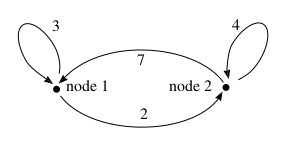

In [124]:
using IJulia
IJulia.display("image/png", read("graph.png"))

La dimension de la matrice `S` est $2 \times 2$ car deux noeuds. Les arcs $i \rightarrow j$ sont décrits par les élements de `S[j,i]`. L'ordre est inversé afin de garder le produit matriciel `S . x` avec `x` un vecteur colonne. 

On notera que les packages Julia GraphPlot.jl ne n'affiche pas correctement ce genre de matrice est que SimpleWeightedGraphs.jl ne prend pas une matrice (max,+). 

Arc $2 \rightarrow 1$ avec la valeur MP(7):

In [125]:
S[1,2]

(max,+) 7

Valeurs propres:

In [126]:
r.eigenvalues

2-element (max,+) vector:
  4.5
  4.5


Vecteur propre:

In [127]:
r.eigenvectors

2-element (max,+) vector:
  6.5
    4


Nombre de composants connectés trouvés (un seul ne sera retourné):

In [128]:
r.components

1

La liste des noeuds issue de la politique de saturation:

In [129]:
r.policy

2-element Vector{Int64}:
 2
 1

### Résolution d'équations linéaires Max-Plus $A \otimes x = b$

Soit $A \in \mathbb{R}_{\varepsilon}^{n \times n}$ une matrice Max-plus carrée et $b \in \mathbb{R}_{\varepsilon}^{n}$ un vecteur colonne. La solution de $A \otimes x = b$ est donnée par :
$$x = A^{-1} \otimes b$$

L'inverse de $A$ peut être donné par les fonctions Julia `inv` ou `^-1` et si la matrice n'est pas inversible alors une erreur Julia est levée :

In [130]:
A = [mp0 1 mp0; 2 mp0 mp0; mp0 mp0 3]

3×3 (max,+) dense matrix:
  .   1   .
  2   .   .
  .   .   3


In [131]:
inv(A)   # Ou bien A^-1

3×3 (max,+) dense matrix:
   .   -2    .
  -1    .    .
   .    .   -3


Vérifions que leur produit donne bien la matrice identité :

In [132]:
A * inv(A)   # Ou bien inv(A) * A

3×3 (max,+) dense matrix:
  0   .   .
  .   0   .
  .   .   0


Calculons $x = A^{-1} \otimes b$ :

In [133]:
B = [3 mp0 mp0; mp0 mp0 4; mp0 5 mp0]

3×3 (max,+) dense matrix:
  3   .   .
  .   .   4
  .   5   .


In [134]:
x = A \ B

3×3 (max,+) dense matrix:
  .   .   2
  2   .   .
  .   2   .


In [135]:
A * x == B

true

### Résolution d'équations linéaires Max-Plus $x = Ax \oplus b$

Soit $A \in \mathbb{R}_{\varepsilon}^{n \times n}$ une matrice Max-plus carrée et $b \in \mathbb{R}_{\varepsilon}^{n}$ un vecteur colonne. La solution de $x = Ax \oplus b$ est donnée par :
$$x = A^* b$$

Où :

$$A^+ \triangleq A^1 \oplus A^2 \oplus A^3 \oplus\;...$$
$$A^* \triangleq A^0 \oplus A^+$$

$A^0$ n'est d'autre que la matrice identité Max-Plus. $A^+$ est calculé par la fonction `plus` et $A^*$ est calculé par la fonction `star`. La solution de l'équation est donnée par la fonction `astarb`. Une solution existe dès que le plus grand circuit dans le graphe
d'adjacence de la matrice a un poids negatif ou nul. Le poids d'un circuit étant donné par la
somme des poids des arcs (coefficients de la matrice) le constituant.

In [136]:
star(MP(2))

(max,+) Inf

In [137]:
star(MP(-2))

(max,+) 0

In [138]:
A = MP([-3 -2; -1 0])
plus(A)

2×2 (max,+) dense matrix:
   0   -2
  -1    0


In [139]:
star(A)

2×2 (max,+) dense matrix:
   0   -2
  -1    0


In [140]:
plus(A) == A * star(A)

true

In [141]:
star(zeros(MP, 2,2)) == star(full(zeros(MP, 2,2)))

true

In [142]:
b = MP([mp0; mp1])

2-element (max,+) vector:
  .
  0


In [143]:
x = astarb(A, b)

2-element (max,+) vector:
  -2
   0


In [144]:
x == A * x + b

true